In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("C:\\infosys\D\\diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
corr_matrix= df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


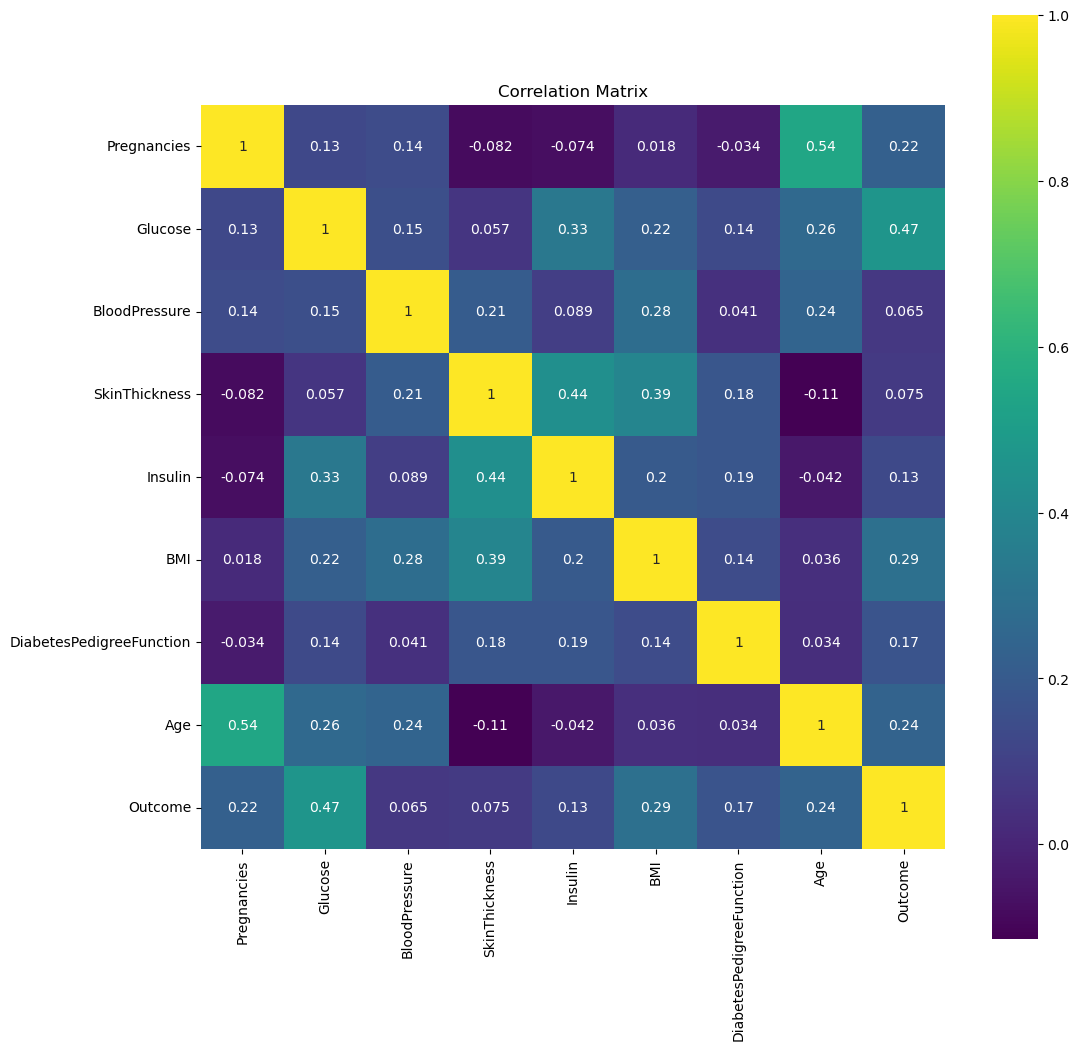

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True)
plt.title('Correlation Matrix')
plt.show()

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

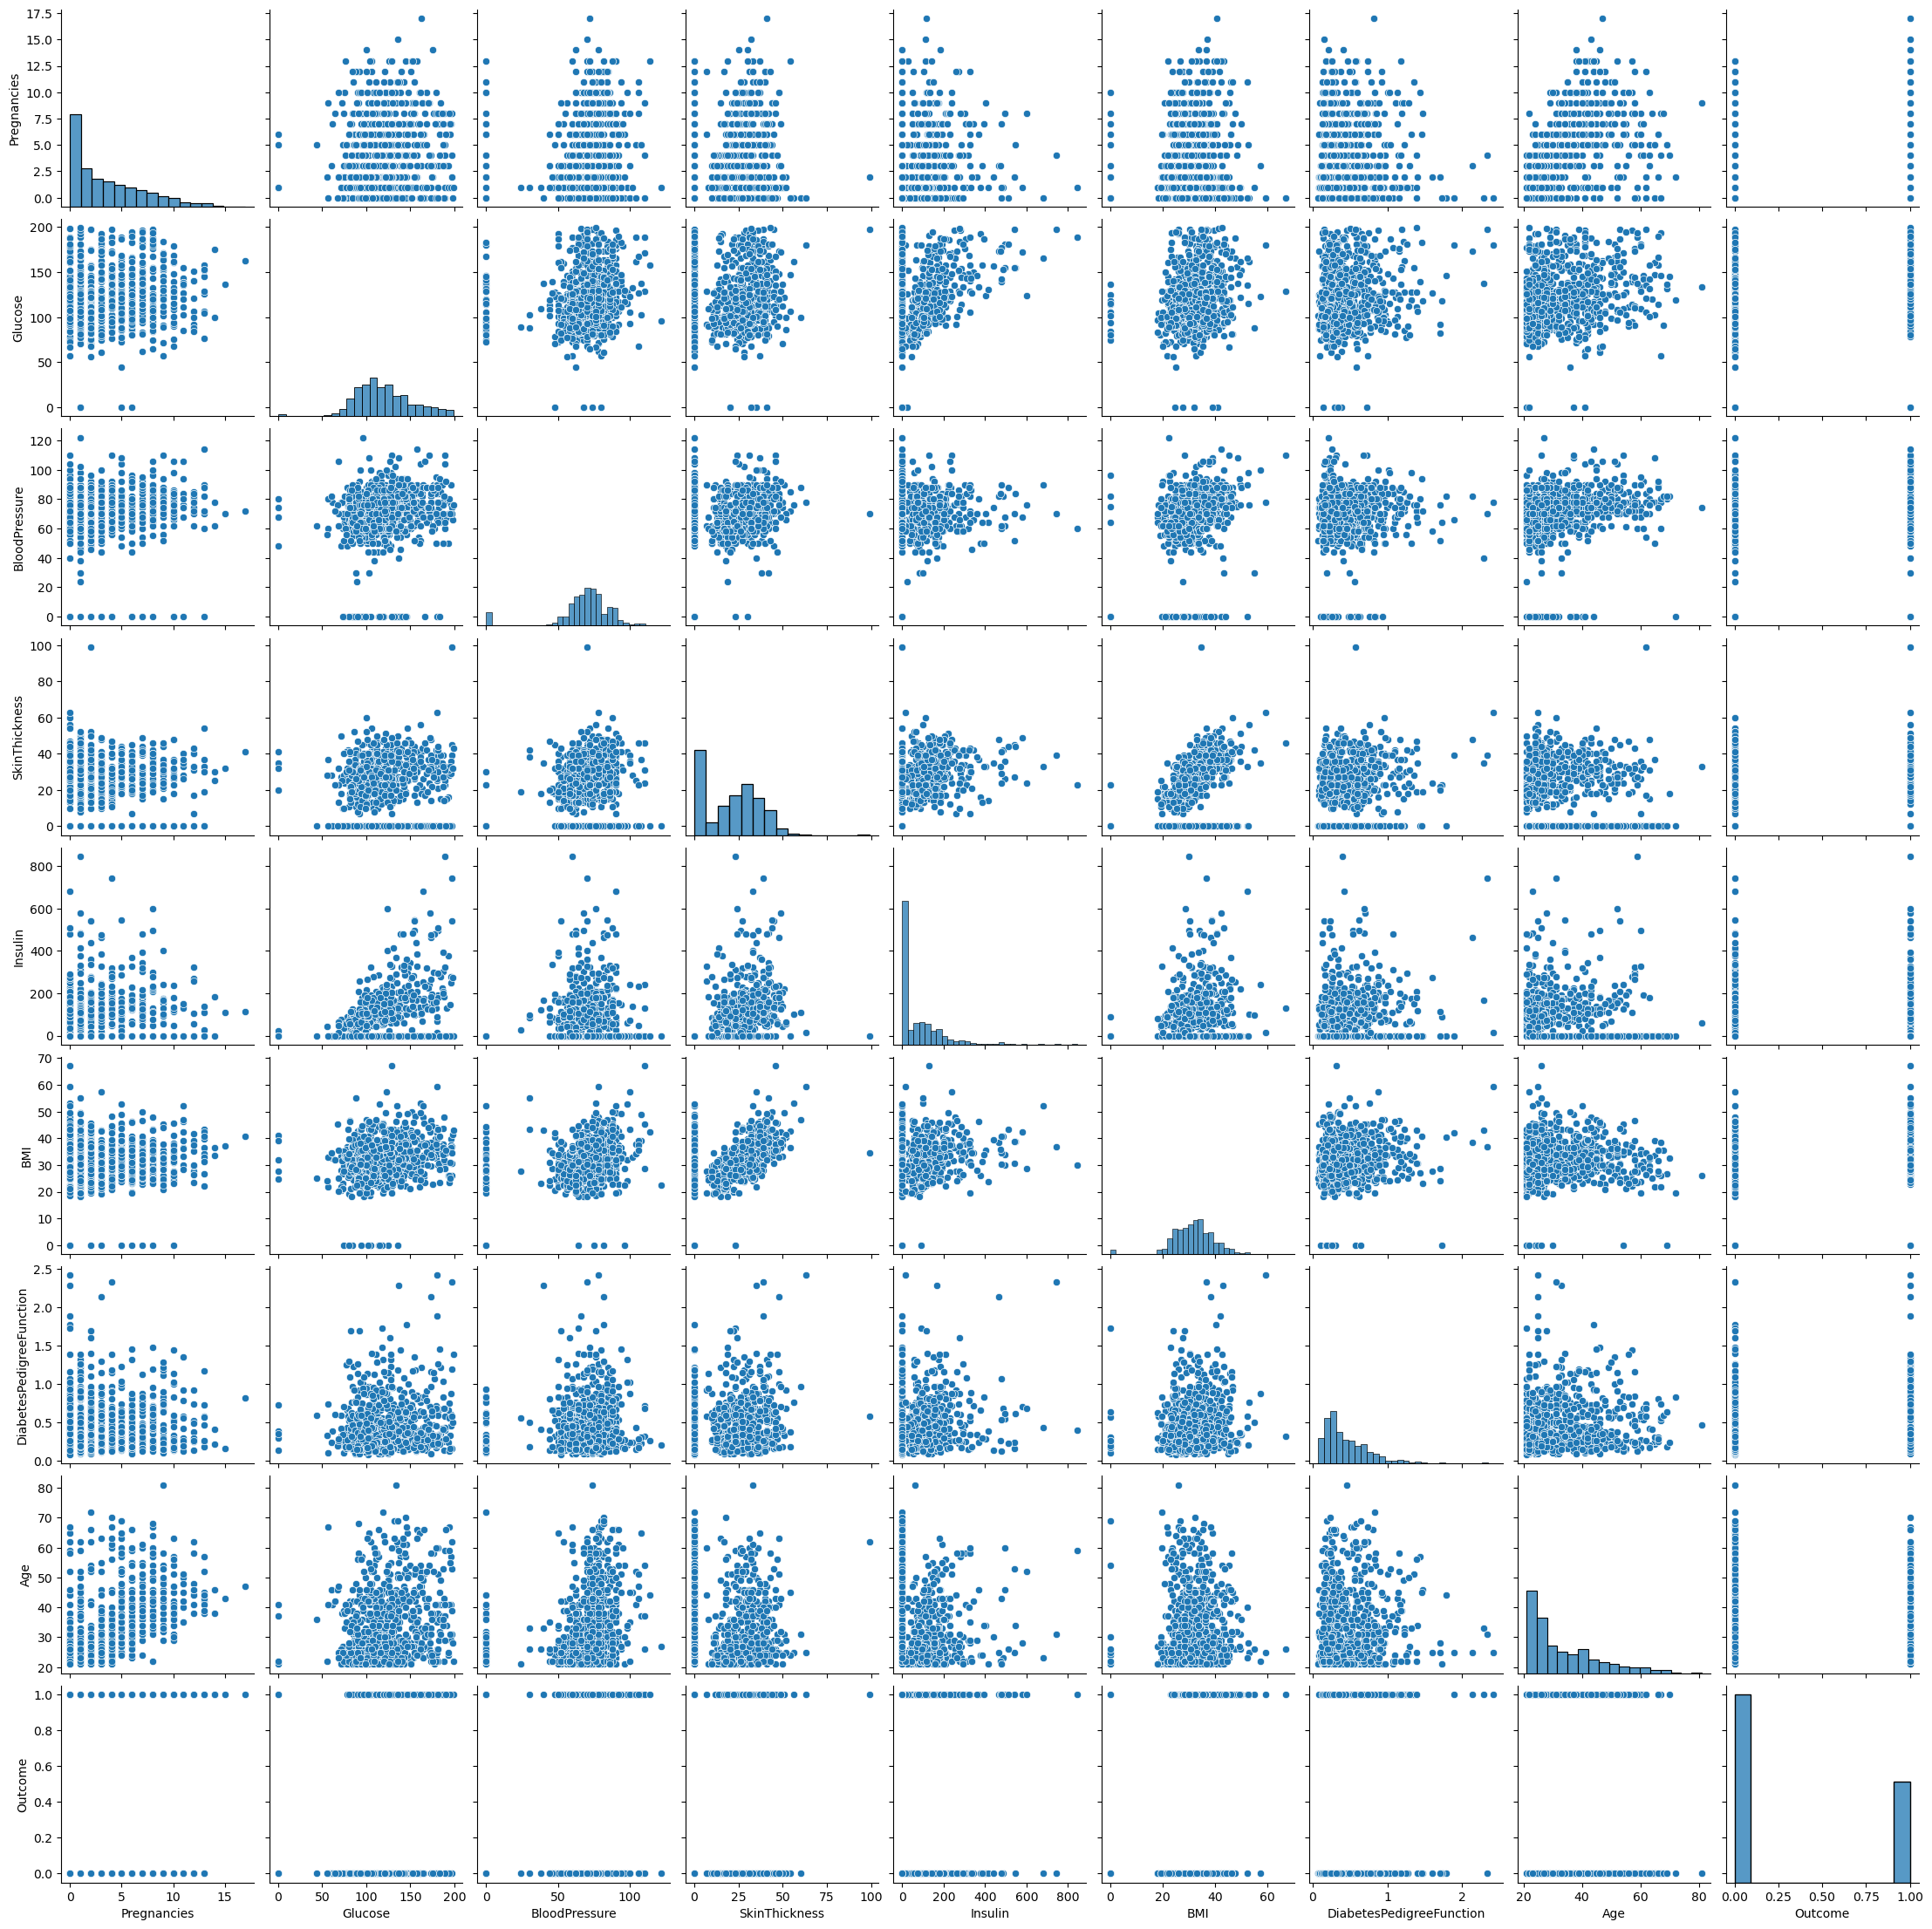

In [10]:
sns.pairplot(df, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
plt.show()

In [11]:
df.isnull().values.any()

False

In [12]:
target_attribute = 'Outcome'

In [13]:
X = df.drop(columns=[target_attribute])
y = df[target_attribute]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Decision Tress Classifier

In [17]:
dtc= DecisionTreeClassifier(random_state=42)

In [18]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
y_pred = dtc.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.25


In [21]:
import seaborn as sns

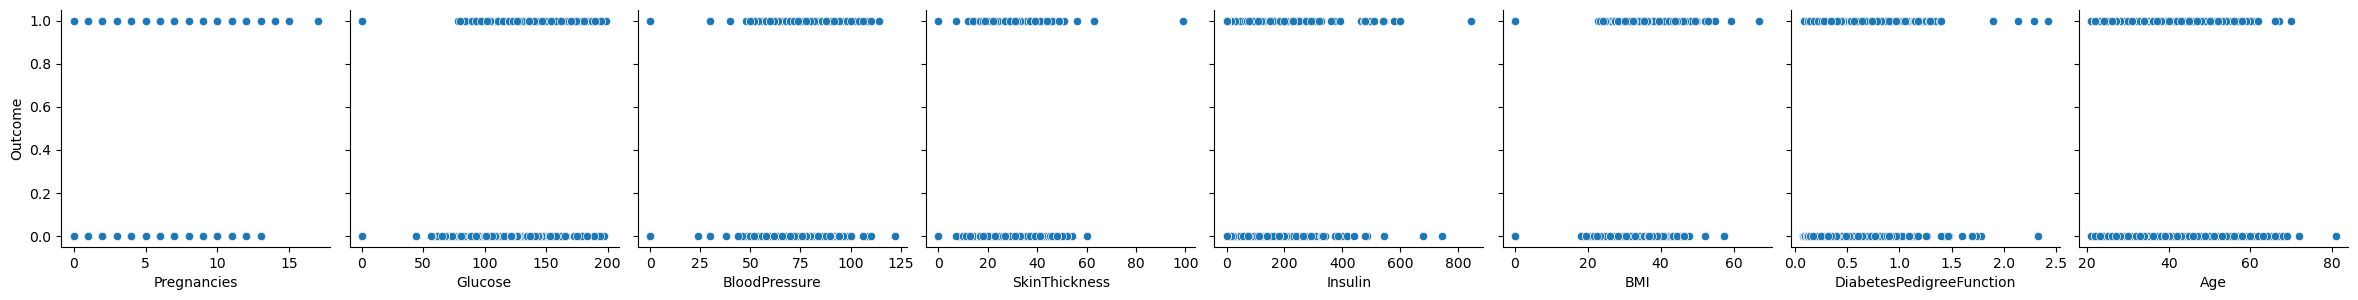

In [22]:
sns.pairplot(df, x_vars=X.columns, y_vars=[target_attribute], height=3, aspect=1)
plt.show()

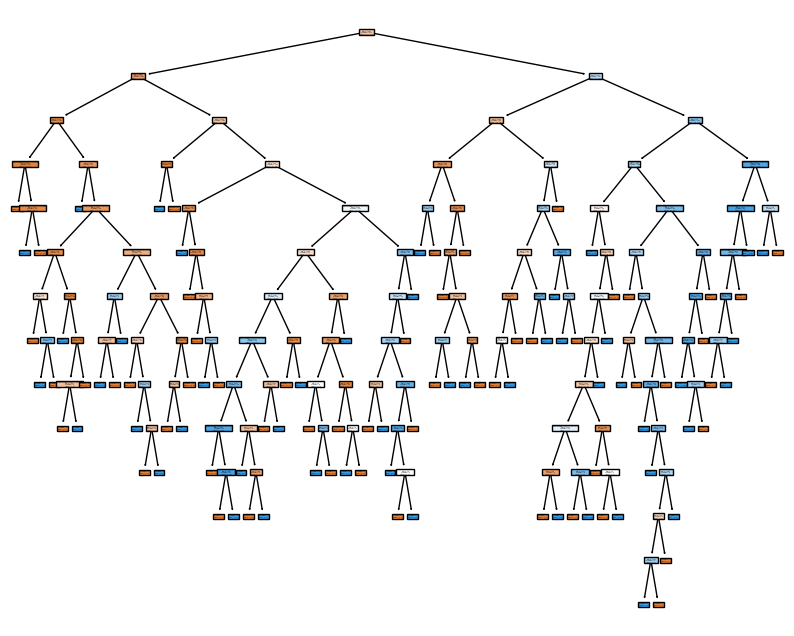

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(10,8))
plot_tree(dtc, feature_names=X.columns, filled=True)
plt.show()

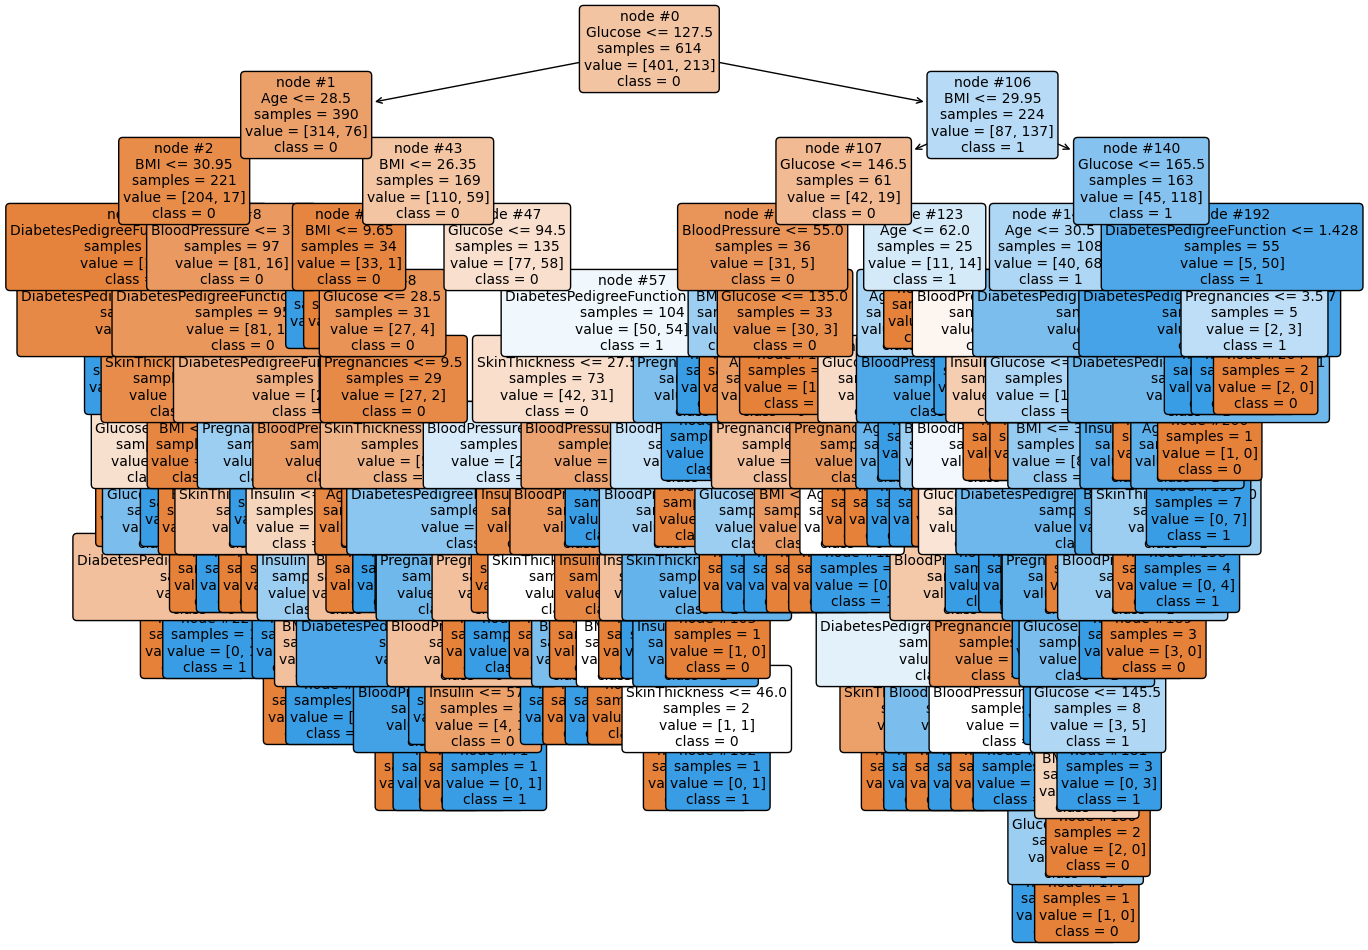

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Assume 'dtc' is your trained DecisionTreeClassifier object
# and 'X' is your feature dataframe

plt.figure(figsize=(15,12))  # Increase the figure size
plot_tree(dtc, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True,
          fontsize=10, 
          class_names=['0', '1'],
          impurity=False, 
          node_ids=True,  
          max_depth=None) 

plt.show()